# Stock Prices Prediction Using Keras Long Term Short Memory

In [110]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yahooFinance
import datetime

In [111]:
# Importing the training set
ticker="META"
slidingWindowSize=90
startDate = datetime.datetime(2018, 1, 1)
endDate = datetime.datetime(2022, 12, 31)
GetFacebookInformation = yahooFinance.Ticker(ticker)
pd.set_option('display.max_rows', None)

 
# pass the parameters as the taken dates for start and end
pd.set_option('display.max_rows', None)
dataset_train=GetFacebookInformation.history(start=startDate, end=endDate)

#dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [112]:
dataset_train.head()




,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,177.679993,181.580002,177.550003,181.419998,18151900,0.0,0.0
2018-01-03 00:00:00-05:00,181.880005,184.779999,181.330002,184.669998,16886600,0.0,0.0
2018-01-04 00:00:00-05:00,184.899994,186.210007,184.100006,184.330002,13880900,0.0,0.0
2018-01-05 00:00:00-05:00,185.589996,186.899994,184.929993,186.850006,13574500,0.0,0.0
2018-01-08 00:00:00-05:00,187.199997,188.899994,186.330002,188.279999,17994700,0.0,0.0


In [113]:

#for i in range ( 10 ):
#   print( training_set [i] )
#print(training_set.shape)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [114]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(slidingWindowSize, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-slidingWindowSize:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [115]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [116]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [117]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [118]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [119]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [120]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [121]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
37/37 [==============================] - 12s 99ms/step - loss: 0.0346
Epoch 2/100
37/37 [==============================] - 4s 95ms/step - loss: 0.0084
Epoch 3/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0081
Epoch 4/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0075
Epoch 5/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0064
Epoch 6/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0075
Epoch 7/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0058
Epoch 8/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0052
Epoch 9/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0058
Epoch 10/100
37/37 [==============================] - 4s 98ms/step - loss: 0.0050
Epoch 11/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0045
Epoch 12/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0042
Epoch 13/100
37/37 [====

In [122]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test=GetFacebookInformation.history(period="ytd")
#dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [123]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - slidingWindowSize:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#for i in range(60, 76):
for i in range(slidingWindowSize, inputs.shape[0]):
    X_test.append(inputs[i-slidingWindowSize:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


6/6 [==============================] - 2s 28ms/step


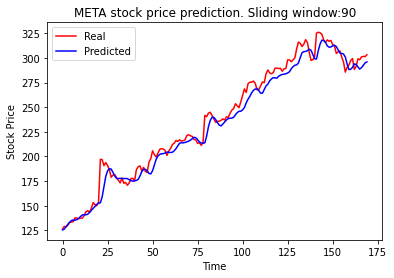

In [124]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted')
plt.title(ticker+' stock price prediction. Sliding window:'+str(slidingWindowSize))
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.plot()
plt.savefig(ticker+'-'+str(slidingWindowSize), bbox_inches='tight', dpi = 1000)
plt.show()

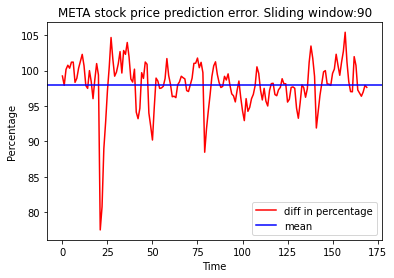

In [127]:
error=np.multiply(np.divide(predicted_stock_price, real_stock_price),100)
meanError=np.mean(error)
plt.plot(error, color = 'red', label = 'diff in percentage')
plt.axhline(meanError, color = 'blue', label = 'mean')
plt.title(ticker+' stock price prediction error. Sliding window:'+str(slidingWindowSize))
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend()
plt.plot()
plt.savefig(ticker+'-error-'+str(slidingWindowSize), bbox_inches='tight', dpi = 1000)
plt.show()